# TensorFlow 입문

## TensorFlow 설치와 동작 확인하기

In [1]:
import tensorflow as tf
sess = tf.Session()
hello = tf.constant('Hello')
print(sess.run(hello))

b'Hello'


## TensorFlow 데이터 플로 그래프

### 덧셈하는 데이터 플로 그래프

In [2]:
# TensorFlow 읽어들이기
import tensorflow as tf

# 상수 정의하기
a = tf.constant(100)
b = tf.constant(30)

# 연산 정의하기
add_op = a + b

# 세션 시작하기
sess = tf.Session()
res = sess.run(add_op)  # 식 평가하기
print(res)

130


### 곱셈하는 데이터 플로 그래프

In [3]:
# TensorFlow 읽어들이기
import tensorflow as tf

# 상수 정의하기
a = tf.constant(10)
b = tf.constant(20)
c = tf.constant(30)

# 연산 정의하기
mul_op = (a + b) * c

# 세션 시작하기
sess = tf.Session()
res = sess.run(mul_op)  # 식 평가하기
print(res)

900


### 데이터 플로 그래프를 그림으로 확인하기

In [4]:
# TensorFlow 읽어들이기
import tensorflow as tf

# 상수 정의하기
a = tf.constant(10, name='10')
b = tf.constant(20, name='20')
c = tf.constant(30, name='30')

# 연산 정의하기
add_op = tf.add(a,b, name='add')
mul_op = tf.multiply(add_op, c, name='mul')

# 세션 시작하기
sess = tf.Session()
res = sess.run(mul_op)  # 식 평가하기
print(res)

# 텐서플로로 그래프 출력하기
tf.summary.FileWriter('.logs', sess.graph)

900


### 변수 사용하기

In [5]:
import tensorflow as tf

# 변수 정의하기
v = tf.Variable(0, name='v')

# 상수 정의하기
a = tf.constant(10, name='10')
b = tf.constant(20, name='20')

# 연산 정의하기
mul_op = tf.multiply(a, b, name='mul')
assign_op = tf.assign(v, mul_op)

# 세션 시작하기
sess = tf.Session()
# 연산 실행하기
sess.run(assign_op)

# 텐서플로로 그래프 출력하기
tf.summary.FileWriter('.logs', sess.graph)

#결과 출력하기
res = sess.run(v)
print(res)

200


### 플레이스홀더 사용하기

In [6]:
import tensorflow as tf

# 플레이스홀더 정의하기 
a = tf.placeholder(tf.int32, [5])

# 벡터를 2배 하는 연산 정의하기
two = tf.constant(2)
x2_op = a * two

# 세션 시작하기 
sess = tf.Session()

# 플레이스 홀더에 값을 넣어 실행하기 
res1 = sess.run(x2_op, feed_dict={ a: [1, 2, 3, 4, 5] })
print(res1)
res2 = sess.run(x2_op, feed_dict={ a: [5, 6, 7, 10, 100] })
print(res2)

[ 2  4  6  8 10]
[ 10  12  14  20 200]


In [7]:
import tensorflow as tf

# 플레이스홀더 정의하기 
a = tf.placeholder(tf.int32, [None, 2])

# 벡터를 2배 하는 연산 정의하기 
two = tf.constant(2)
x2_op = a * two

# 세션 시작하기 
sess = tf.Session()

# 플레이스 홀더에 값을 넣어 실행하기 
sample_list = [[1, 1], [2, 2], [3, 3], [4, 4]]
res = sess.run(x2_op, feed_dict={ a: sample_list })
print(res)

[[2 2]
 [4 4]
 [6 6]
 [8 8]]


# TensorFlow로 붓꽃 분류하기

In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# 붓꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기
y_labels = iris_data.loc[:,"Name"]
x_data = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

## 레이블을 One-hot 벡터 형식으로 바꾸기

In [3]:
# 레이블 데이터를 One-hot 형식으로 변환하기
labels = {
    'Iris-setosa': [1, 0, 0], 
    'Iris-versicolor': [0, 1, 0], 
    'Iris-virginica': [0, 0, 1]
}
y_nums = list(map(lambda v : labels[v] , y_labels))

## 테스트 데이터를 학습전용 데이터와 테스트 전용 데이터로 분활하기

In [5]:
# 학습 전용과 테스트 전용 분리하기
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_nums, train_size=0.8)

## 학습 알고리즘 정의하기

In [6]:
# 붓꽃 데이터의 입력값(4차원)과 출력값(3차원)을 넣을 위치 정의하기
x  = tf.placeholder(tf.float32, [None, 4])
y_ = tf.placeholder(tf.float32, [None, 3])

# 가중치와 바이어스 변수 정의하기
w = tf.Variable(tf.zeros([4, 3])) # 가중치
b = tf.Variable(tf.zeros([3])) # 바이어스

# 소프트맥스 회귀 정의하기
y = tf.nn.softmax(tf.matmul(x, w) + b)

# 모델 훈련하기
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
optimizer = tf.train.AdamOptimizer(0.05)
train = optimizer.minimize(cross_entropy)

# 정답률 구하기
predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

## 테스트 학습 및 실행 테스트

In [8]:
# 세션 시작하고 변수 초기화하기
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 학습하기
train_feed_dict = {x: x_train, y_: y_train}
for step in range(300):
    sess.run(train, feed_dict=train_feed_dict)

# 테스트 테이터를 사용해서 예측하고 최종 정답률 구하기
acc = sess.run(accuracy, feed_dict={x: x_test, y_: y_test})
print("정답률=", acc)

정답률= 0.96666664


## keras

In [9]:
import tensorflow.contrib.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 붓꽃 데이터 읽어 들이기
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# 붓꽃 데이터를 레이블과 입력 데이터로 분리하기
y_labels = iris_data.loc[:,"Name"]
x_data = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# 레이블 데이터를 One-hot 형식으로 변환하기
labels = {
    'Iris-setosa': [1, 0, 0], 
    'Iris-versicolor': [0, 1, 0], 
    'Iris-virginica': [0, 0, 1]
}
y_nums = np.array(list(map(lambda v : labels[v] , y_labels)))
x_data = np.array(x_data)

# 학습 전용과 테스트 전용 분리하기
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_nums, train_size=0.8)

# 모델의 구조 정의하기
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기
model.fit(np.array(x_train), np.array(y_train),
    batch_size=20,
    epochs=300)
#    validation_data=(x_test, y_test))

# 데이터 평가하기
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 120 samples
Epoch 1/300
120/120 [==============================] - 0s 989us/sample - loss: 3.3505 - acc: 0.3333
Epoch 2/300
120/120 [==============================] - 0s 108us/sample - loss: 3.0658 - acc: 0.3333
Epoch 3/300
120/120 [==============================] - 0s 150us/sample - loss: 2.7930 - acc: 0.3333
Epoch 4/300
120/120 [==============================] - 0s 92us/sample - loss: 2.5422 - acc: 0.3333
Epoch 5/300
120/120 [==============================] - 0s 108us/sample - loss: 2.3158 - acc: 0.3333
Epoch 6/300
120/120 [==============

# 딥러닝으로 손글씨 숫자 판정하기

## MNIST 데이터 사용하기

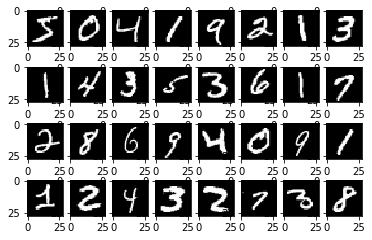

In [2]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot

# MNIST 데이터 읽어 들이기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터를 4x8로 출력하기
for i in range(0, 32):
    pyplot.subplot(4, 8, i+1)
    pyplot.imshow(x_train[i], cmap='gray')
    
pyplot.show()

## 1차원 배열로 변환해 정규화하기

In [3]:
# 데이터를 28*28=784의 1차원 배열로 변환하기
x_train = x_train.reshape(-1, 784).astype('float32')/255
x_test = x_test.reshape(-1, 784).astype('float32')/255
# 데이터 확인하기
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'), 10)

## keras로 모델 구축하기

In [5]:
# 입력과 출력 지정하기
in_size = 28*28
out_size = 10

# 모델 구조 정의하기
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# 모델 구축하기
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

# 학습하기
model.fit(x_train, y_train, batch_size=20, epochs=20)

# 모델 평가하기
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





60000/60000 [==============================] - 28s 467us/step - loss: 0.1886 - acc: 0.9435
Epoch 2/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.0773 - acc: 0.9762
Epoch 3/20
60000/60000 [==============================] - 28s 468us/step - loss: 0.0519 - acc: 0.9831
Epoch 4/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.0378 - acc: 0.98764s - loss: 0.0376 -  -
Epoch 5/20
60000/60000 [==============================] - 36s 596us/step - loss: 0.0281 - acc: 0.9911
Epoch 6/20
60000/60000 [==============================] - 32s 531us/step - loss: 0.0230 - acc: 0.9926
Epoch 7/20
60000/60000 [==============================] - 28s 475us/step - loss: 0.0188 - acc: 0.9934
Epoch 8/20
60000/60000 [==============================] - 28s 473us/step - loss: 0.0169 - acc: 0.9944
Epoch 9/20
60000/60000 [==============================]

## MLP 전체 프로그램


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.2480 - acc: 0.9240 - val_loss: 0.1071 - val_acc: 0.9639
Epoch 2/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.1029 - acc: 0.9685 - val_loss: 0.0922 - val_acc: 0.9722
Epoch 3/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0750 - acc: 0.9773 - val_loss: 0.0801 - val_acc: 0.9765
Epoch 4/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.0600 - acc: 0.9818 - val_loss: 0.0740 - val_acc: 0.9795
Epoch 5/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.0501 - acc: 0.9854 - val_loss: 0.0848 - val_acc: 0.9784
Epoch 6/50
60000/60000 [==============================] - 9s 155us/step - loss: 0.0430 - acc: 0.9867 - val_loss: 0.0806 - val_acc: 0.9790
Epoch 

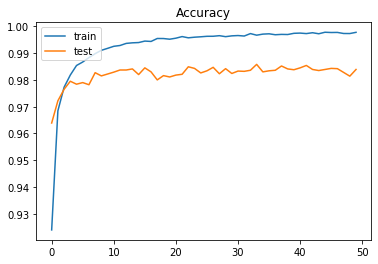

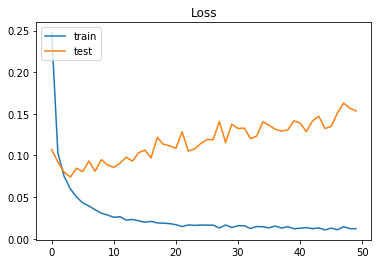

In [6]:
# MLP로 MNIST 분류 문제 풀기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 입력과 출력 지정하기
in_size = 28 * 28
out_size = 10

# MNIST 데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터를 28*28=784의 1차원 배열로 변환하기
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# MLP모델의 구조 정의하기
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 학습 실행하기
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

# 모델 평가하기
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 개선힌트

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2199 - acc: 0.9331 - val_loss: 0.0538 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0823 - acc: 0.9754 - val_loss: 0.0406 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0625 - acc: 0.9816 - val_loss: 0.0340 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0535 - acc: 0.9838 - val_loss: 0.0335 - val_acc: 0.9900
Epoch 5/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0479 - acc: 0.9863 - val_loss: 0.0305 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0471 - acc: 0.9866 - val_loss: 0.0417 - val_acc: 0.9865
Epoch 7/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0480 - acc: 0.9864 - val_loss: 0.0352 - 

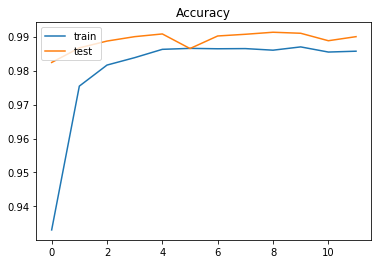

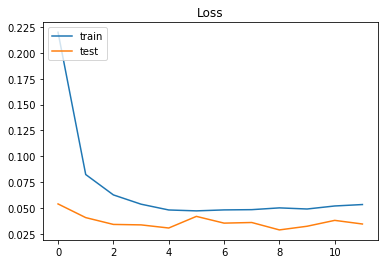

In [10]:
# CNN으로 MNIST 분류 문제 풀기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 입력과 출력 지정하기
im_rows = 28 # 이미지의 세로 픽셀 크기
im_cols = 28 # 이미지의 가로 픽셀 크기
im_color = 1 # 이미지의 색공간 / 그레이스케일
in_shape = (im_rows, im_cols, im_color)
out_size = 10

# MNIST 데이터 읽어 들이기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 읽어들인 데이터를 3차원 배열로 변환하기
x_train = x_train.reshape(-1, im_rows, im_cols, im_color)
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape(-1, im_rows, im_cols, im_color)
x_test = x_test.astype('float32') / 255

# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

# CNN 모델 구조 정의하기
model = Sequential()
model.add(Conv2D(32,
                kernel_size=(3, 3),
                activation='relu',
                input_shape = in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

# 모델 컴파일 하기
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

# 학습하기
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_test, y_test))

# 모델 평가하기
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 사진에 찍힌 물체 인식하기

## CIFAR-10 내려받기

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 312s 2us/step


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize=(10,10))

labels = ["airplane", 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(0, 40):
    